In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams ['figure.figsize'] = (12,8)
import warnings
warnings.simplefilter('ignore')

In [2]:
movie = pd.read_csv(r"C:\Users\chine\Downloads\Raw Data\movies.csv")

In [3]:
pd.set_option('display.max_rows', None)

In [3]:
movie

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [4]:
 movie.duplicated().any()

False

In [5]:
movie.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [6]:
#removing null values
movie['votes'].fillna(0, inplace = True)

In [7]:
movie['budget'].fillna(0, inplace =True)

In [8]:
movie['gross'].fillna(0, inplace = True)

In [9]:
movie.dropna(inplace = True)

In [10]:
#Checking if all nulls has been fixed
movie.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [11]:
#checking datatype
movie.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [12]:
#changing data types

movie['budget'] = movie['budget'].astype('int64')

movie['votes'] = movie['votes'].astype('int64')

movie['gross'] = movie['gross'].astype('int64')

In [14]:
#checking if datatype has been changed
movie.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [13]:
#removing the year coloumn because it does tally with the year released column
movie=movie.drop('year', axis=1)

In [14]:
#spliting the released coloumn to get the correct year
movie['year']= movie['released'].str.extract(pat = '([0-9]{4})'). astype(int)

In [15]:
#sorting the data by gross column to see the highest gross
movie.sort_values(by=['gross'], inplace = False, ascending = False)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,On the Edge,PG-13,Drama,"May 2, 1986 (United States)",6.8,214,Rob Nilsson,Roy Kissin,Bruce Dern,United States,0,0,Alliance Communications Corporation,95.0,1986
3425,The Acid House,Unrated,Comedy,"January 1, 1999 (United Kingdom)",6.3,7400,Paul McGuigan,Irvine Welsh,Stephen McCole,United Kingdom,0,0,Picture Palace North,111.0,1999
835,Came a Hot Friday,PG,Adventure,"October 4, 1985 (United States)",6.6,192,Ian Mune,Ronald Hugh Morrieson,Peter Bland,New Zealand,0,0,Mirage Films,101.0,1985
836,Wuthering Heights,Not Rated,Drama,"October 9, 1985 (France)",6.5,339,Jacques Rivette,Pascal Bonitzer,Fabienne Babe,France,0,0,La Cecilia,130.0,1985


<function matplotlib.pyplot.show(close=None, block=None)>

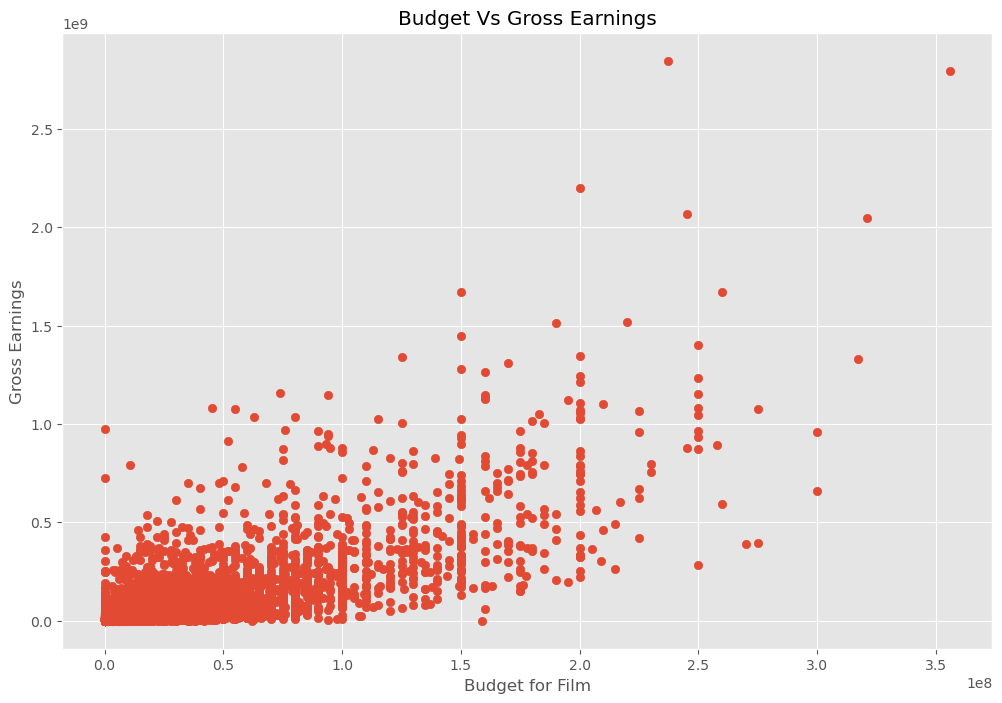

In [16]:
plt.scatter(x=movie['budget'], y=movie['gross'])
plt.title("Budget Vs Gross Earnings")
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show

<AxesSubplot:xlabel='budget', ylabel='gross'>

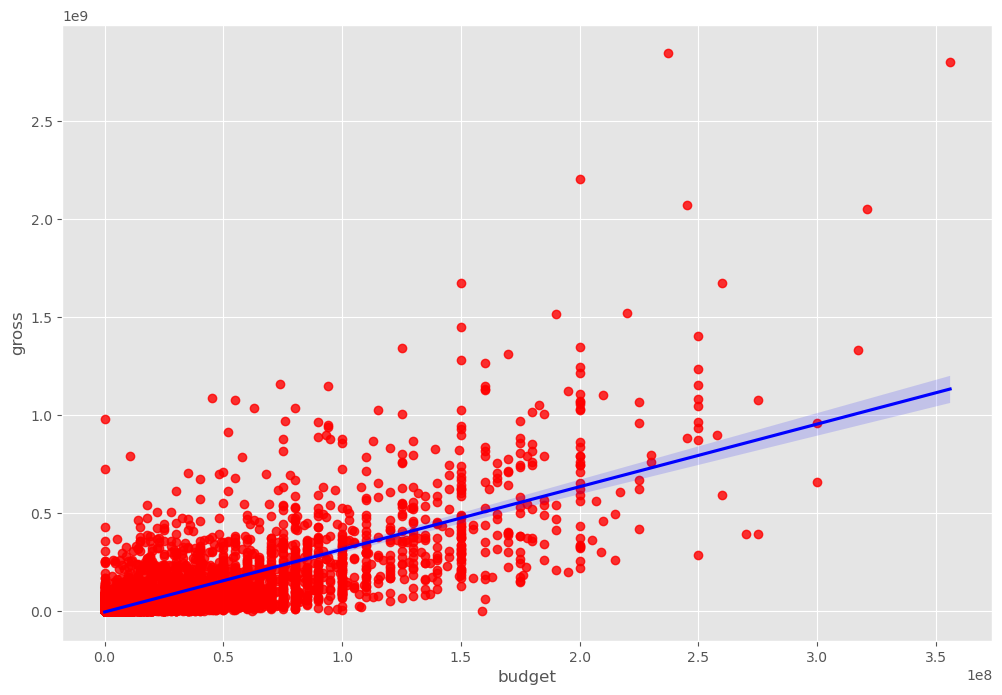

In [17]:
sns.regplot(x='budget', y='gross',data=movie, scatter_kws={'color':'red'},line_kws={'color':'blue'})

In [18]:
#To see the corroleration in the data
movie.corr(method='pearson')

,score,votes,budget,gross,runtime,year
score,1.000000,0.411931,0.056781,0.188259,0.400574,0.109815
votes,0.411931,1.000000,0.485301,0.632987,0.309366,0.222317
budget,0.056781,0.485301,1.000000,0.750562,0.270042,0.305530
gross,0.188259,0.632987,0.750562,1.000000,0.244942,0.257703
runtime,0.400574,0.309366,0.270042,0.244942,1.000000,0.120370
year,0.109815,0.222317,0.305530,0.257703,0.120370,1.000000


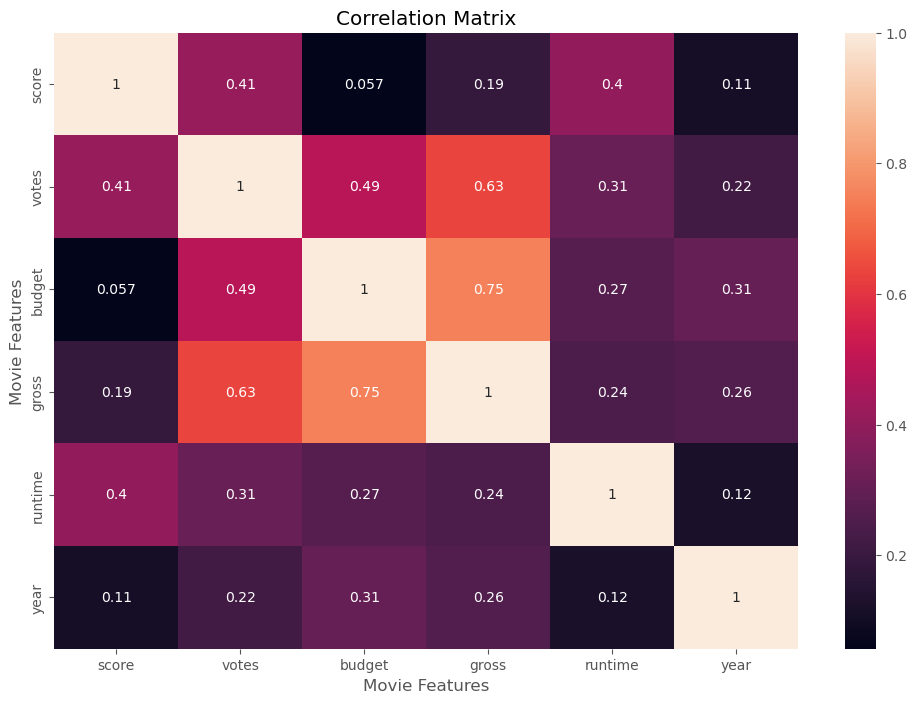

In [16]:
correlation_matrix = movie.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix")
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [17]:
#numerizing the whole data to get colleration
movie_numerized = movie
for col_name in movie_numerized.columns:
    if(movie_numerized[col_name].dtype=='object'):
        movie_numerized[col_name] = movie_numerized[col_name].astype('category')
        movie_numerized[col_name] = movie_numerized[col_name].cat.codes

        
movie_numerized

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year
0,6506,6,6,1685,8.4,927000,2544,3958,1022,54,19000000,46998772,2273,146.0,1980
1,5498,6,1,1472,5.8,65000,2233,1612,316,55,4500000,58853106,710,104.0,1980
2,5073,4,0,1751,8.7,1200000,1093,2534,1708,55,18000000,538375067,1505,124.0,1980
3,282,4,4,1472,7.7,221000,1279,1975,2197,55,3500000,83453539,1769,88.0,1980
4,1016,6,4,1523,7.3,108000,1037,511,398,55,6000000,39846344,1736,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7652,5713,3,0,490,6.8,3700,1076,1652,2747,8,80000000,461421559,360,149.0,2020
7653,6399,6,5,91,5.4,2400,2475,3827,2385,55,0,3661,1860,98.0,2020
7656,6936,5,4,1865,5.0,294,2470,3820,2326,55,0,413378,1862,120.0,2020
7658,789,6,6,1091,6.6,35,1739,1051,515,55,5000,0,1709,78.0,2020


In [18]:
# To see the orgianal data
movie

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7652,The Eight Hundred,Not Rated,Action,"August 28, 2020 (United States)",6.8,3700,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000,461421559,Beijing Diqi Yinxiang Entertainment,149.0,2020
7653,The Quarry,R,Crime,"April 17, 2020 (Mexico)",5.4,2400,Scott Teems,Scott Teems,Shea Whigham,United States,0,3661,Prowess Pictures,98.0,2020
7656,Tulsa,PG-13,Comedy,"June 3, 2020 (United States)",5.0,294,Scott Pryor,Scott Pryor,Scott Pryor,United States,0,413378,Pryor Entertainment,120.0,2020
7658,Black Wall Street Burning,R,Drama,"February 7, 2020 (United States)",6.6,35,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000,0,Notis Studio,78.0,2020


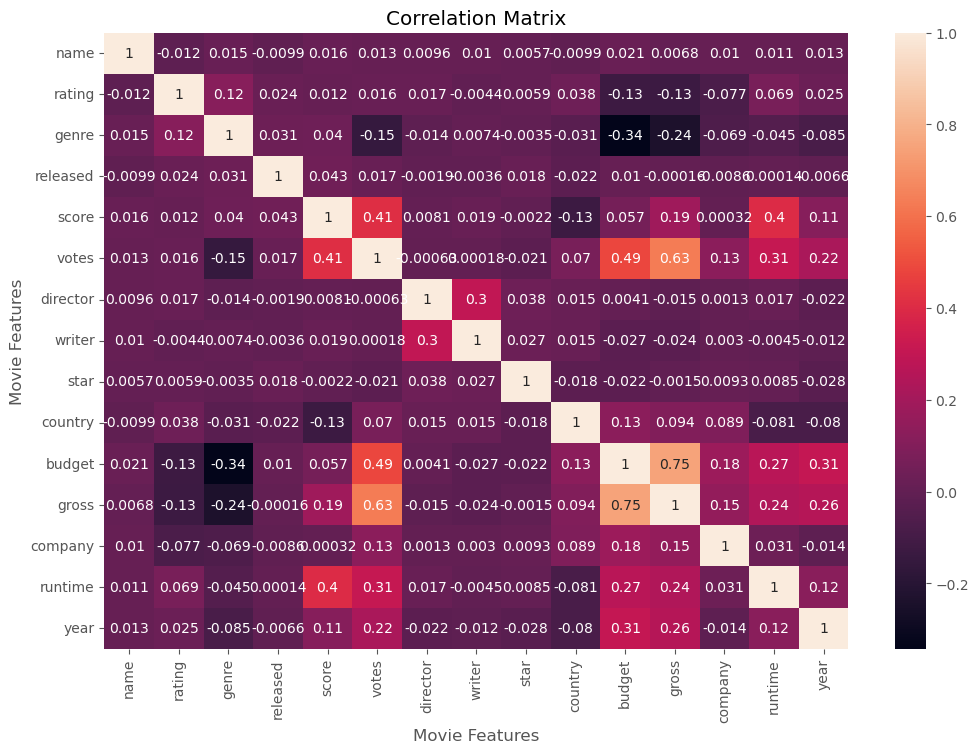

In [18]:
correlation_matrix = movie_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix")
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [22]:
movie_numerized.corr()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year
name,1.000000,-0.011924,0.015300,-0.009906,0.016181,0.013180,0.009608,0.010217,0.005685,-0.009939,0.020825,0.006817,0.010073,0.011151,0.012711
rating,-0.011924,1.000000,0.117566,0.024319,0.011538,0.016086,0.017205,-0.004387,0.005905,0.037738,-0.126806,-0.128910,-0.076807,0.069089,0.025213
genre,0.015300,0.117566,1.000000,0.030625,0.040090,-0.148420,-0.013508,0.007351,-0.003525,-0.031485,-0.342064,-0.240903,-0.068678,-0.044631,-0.084559
released,-0.009906,0.024319,0.030625,1.000000,0.043175,0.016877,-0.001868,-0.003569,0.018026,-0.022109,0.009995,-0.000164,-0.008570,0.000145,-0.006580
score,0.016181,0.011538,0.040090,0.043175,1.000000,0.411931,0.008071,0.019084,-0.002193,-0.130094,0.056781,0.188259,0.000316,0.400574,0.109815
votes,0.013180,0.016086,-0.148420,0.016877,0.411931,1.000000,-0.000627,0.000177,-0.020977,0.069582,0.485301,0.632987,0.129596,0.309366,0.222317
director,0.009608,0.017205,-0.013508,-0.001868,0.008071,-0.000627,1.000000,0.297479,0.037570,0.015245,0.004140,-0.015027,0.001337,0.017386,-0.022096
writer,0.010217,-0.004387,0.007351,-0.003569,0.019084,0.000177,0.297479,1.000000,0.026584,0.014937,-0.027145,-0.023834,0.003035,-0.004526,-0.012013
star,0.005685,0.005905,-0.003525,0.018026,-0.002193,-0.020977,0.037570,0.026584,1.000000,-0.017626,-0.021930,-0.001470,0.009317,0.008474,-0.028103
country,-0.009939,0.037738,-0.031485,-0.022109,-0.130094,0.069582,0.015245,0.014937,-0.017626,1.000000,0.126337,0.094147,0.089006,-0.081464,-0.080397


In [43]:
correlation_mat = movie_numerized.corr()
correlation_sorted = correlation_mat.unstack()
correlation_summary = correlation_sorted.sort_values(ascending = False)
correlation_summary

name      name        1.000000
rating    rating      1.000000
runtime   runtime     1.000000
company   company     1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
genre     genre       1.000000
writer    writer      1.000000
year      year        1.000000
budget    gross       0.750562
gross     budget      0.750562
votes     gross       0.632987
gross     votes       0.632987
votes     budget      0.485301
budget    votes       0.485301
votes     score       0.411931
score     votes       0.411931
          runtime     0.400574
runtime   score       0.400574
          votes       0.309366
votes     runtime     0.309366
year      budget      0.305530
budget    year        0.305530
director  writer      0.297479
writer    director    0.297479
runtime   budget      0.270042
budget  

In [50]:
#To see columns with high correlation greater or = 0.5
high_correlation=correlation_summary[(correlation_summary) >= 0.5].sort_values()
high_correlation

gross     votes       0.632987
votes     gross       0.632987
gross     budget      0.750562
budget    gross       0.750562
year      year        1.000000
writer    writer      1.000000
genre     genre       1.000000
released  released    1.000000
score     score       1.000000
name      name        1.000000
star      star        1.000000
country   country     1.000000
budget    budget      1.000000
gross     gross       1.000000
company   company     1.000000
runtime   runtime     1.000000
rating    rating      1.000000
director  director    1.000000
votes     votes       1.000000
dtype: float64

In [1]:
#In conclusion Votes and Budget has the highest correlation to gross earnings